In [1]:
from src.data_preprocessor import DataProcessor
from data_configs.configs import *
from models.neural_networks import *
from src.cross_validation import CrossValidation
import numpy as np

config = house_votes_84_config
data_processor = DataProcessor(config=config)
cross_validator = CrossValidation(config=config)

In [2]:
raw_data = data_processor.load_data()
data_1 = data_processor.impute_missing_values(raw_data)
data_2 = data_processor.encode_ordinal_features(data_1)

c:\Users\Srikanta\Documents\Intro to Machine Learning\programming_assignment_1\src\data_preprocessor.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


In [3]:
data_2

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [4]:
data_train, data_val = cross_validator.random_partition(data_2, random_state=42)

In [5]:
data_val = data_processor.encode_nominal_features(data_val)

In [6]:
data_test = data_val.to_numpy()
X_val = data_test[:,2:]
y_val = data_test[:,:2]

In [7]:
data_val

,Class Name_democrat,Class Name_republican,handicapped-infants_?,handicapped-infants_n,handicapped-infants_y,water-project-cost-sharing_?,water-project-cost-sharing_n,water-project-cost-sharing_y,adoption-of-the-budget-resolution_?,adoption-of-the-budget-resolution_n,...,superfund-right-to-sue_y,crime_?,crime_n,crime_y,duty-free-exports_?,duty-free-exports_n,duty-free-exports_y,export-administration-act-south-africa_?,export-administration-act-south-africa_n,export-administration-act-south-africa_y
280,1,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
78,1,0,0,0,1,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
113,0,1,0,1,0,1,0,0,0,1,...,1,0,0,1,0,1,0,0,1,0
253,0,1,0,1,0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
324,0,1,0,1,0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,1,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
57,0,1,0,1,0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
126,0,1,0,1,0,1,0,0,0,1,...,1,0,0,1,0,1,0,0,1,0
24,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0


In [8]:
train_data = data_train.to_numpy()
X_train = train_data[:,2:]
y_train = train_data[:,:2]

In [9]:
import random

iterations = 15

param_space = {
    'lr': [0.001,0.0001,0.00001,0.000001],
    'epochs': np.linspace(5000, 20000, num=20).astype(int).tolist()
}

best_score = float('inf')
best_params_linear = {}

for _ in range(iterations):

    # Randomly select parameters
    params = {key: random.choice(value) for key, value in param_space.items()}
    scores = []

    print(f"Testing params: {params}")

    for i, (train_set, _) in enumerate(cross_validator.cross_validation(data_train, n_splits=2, n_repeats=5, random_state=42, stratify=True)):
    
        train_set = data_processor.encode_nominal_features(train_set)

        train_data = train_set.to_numpy()
        X_train = train_data[:,2:]
        y_train = train_data[:,:2]

        # Check if the shapes of X_train and X_val are not equal
        if X_train.shape[1] != X_val.shape[1]:
            # print(f"Shape mismatch between training and validation sets, skipping params: {params}")
            continue

        linear = LinearNetwork(config)

        _, val_losses = linear.logistic_regression(X_train,y_train,X_val,y_val,epochs=params['epochs'],lr=params['lr'],patience=np.inf)

        score = val_losses[-1]
        scores.append(score)

        # Skip to the next parameter set if score > 0.2
        if score > 0.2:
            print(f"Skipping params: {params} due to high score.")
            break  # Exit the current for-loop
        
    avg_score = np.mean(scores)

    print(f"Tested params: {params}, Score: {avg_score}")
    
    if avg_score < best_score:
        best_score = avg_score
        best_params_linear = params
        

print(f"Best parameters: {best_params_linear}, Best score: {best_score}")


Testing params: {'lr': 0.001, 'epochs': 12894}
Skipping params: {'lr': 0.001, 'epochs': 12894} due to high score.
Tested params: {'lr': 0.001, 'epochs': 12894}, Score: 0.30132234850067036
Testing params: {'lr': 0.001, 'epochs': 18421}
Skipping params: {'lr': 0.001, 'epochs': 18421} due to high score.
Tested params: {'lr': 0.001, 'epochs': 18421}, Score: 0.33246606440951243
Testing params: {'lr': 1e-06, 'epochs': 9736}
Skipping params: {'lr': 1e-06, 'epochs': 9736} due to high score.
Tested params: {'lr': 1e-06, 'epochs': 9736}, Score: 0.26046644219586396
Testing params: {'lr': 0.0001, 'epochs': 10526}
Tested params: {'lr': 0.0001, 'epochs': 10526}, Score: 0.12683045699117076
Testing params: {'lr': 0.0001, 'epochs': 17631}
Tested params: {'lr': 0.0001, 'epochs': 17631}, Score: 0.13948202558656037
Testing params: {'lr': 0.001, 'epochs': 12894}
Skipping params: {'lr': 0.001, 'epochs': 12894} due to high score.
Tested params: {'lr': 0.001, 'epochs': 12894}, Score: 0.3013498043417456
Testin

In [10]:
import random

iterations = 15

param_space = {
    'lr': [0.0001,0.00001,0.000001,0.0000001],
    'epochs': np.arange(5000, 20000, 2000).tolist(),
    'n_hidden': np.arange(X_val.shape[1], 60, 15)
}

best_score = float('inf')
best_params_ffn = {}

for _ in range(iterations):

    # Randomly select parameters
    params = {key: random.choice(value) for key, value in param_space.items()}
    scores = []

    print(f"Testing params: {params}")

    for i, (train_set, _) in enumerate(cross_validator.cross_validation(data_train, n_splits=2, n_repeats=5, random_state=42, stratify=True)):
    
        train_set = data_processor.encode_nominal_features(train_set)

        train_data = train_set.to_numpy()
        X_train = train_data[:,2:]
        y_train = train_data[:,:2]

        # Check if the shapes of X_train and X_val are not equal
        if X_train.shape[1] != X_val.shape[1]:
            # print(f"Shape mismatch between training and validation sets, skipping params: {params}")
            continue

        ffn = FeedForwardNetwork(config,n_input=X_train.shape[1],n_hidden_1=params['n_hidden'],n_hidden_2=params['n_hidden'],n_output=y_train.shape[1])

        _, val_losses, _ = ffn.train(X_train,y_train,X_val,y_val,epochs=params['epochs'],lr=params['lr'],patience=500)

        score = val_losses[-1]
        scores.append(score)

        # Skip to the next parameter set if score > 0.2
        if score > 0.2:
            print(f"Skipping params: {params} due to high score.")
            break  # Exit the current for-loop

    avg_score = np.mean(scores)

    print(f"Tested params: {params}, Score: {avg_score}")
    
    if avg_score < best_score:
        best_score = avg_score
        best_params_ffn = params
        

print(f"Best parameters: {best_params_ffn}, Best score: {best_score}")


Testing params: {'lr': 1e-06, 'epochs': 15000, 'n_hidden': 48}
Skipping params: {'lr': 1e-06, 'epochs': 15000, 'n_hidden': 48} due to high score.
Tested params: {'lr': 1e-06, 'epochs': 15000, 'n_hidden': 48}, Score: 0.6596258693853109
Testing params: {'lr': 1e-06, 'epochs': 11000, 'n_hidden': 48}
Skipping params: {'lr': 1e-06, 'epochs': 11000, 'n_hidden': 48} due to high score.
Tested params: {'lr': 1e-06, 'epochs': 11000, 'n_hidden': 48}, Score: 0.6631865593049698
Testing params: {'lr': 1e-07, 'epochs': 15000, 'n_hidden': 48}
Skipping params: {'lr': 1e-07, 'epochs': 15000, 'n_hidden': 48} due to high score.
Tested params: {'lr': 1e-07, 'epochs': 15000, 'n_hidden': 48}, Score: 0.6855949386063596
Testing params: {'lr': 1e-05, 'epochs': 13000, 'n_hidden': 48}
Tested params: {'lr': 1e-05, 'epochs': 13000, 'n_hidden': 48}, Score: 0.12925242360020256
Testing params: {'lr': 1e-05, 'epochs': 9000, 'n_hidden': 48}
Skipping params: {'lr': 1e-05, 'epochs': 9000, 'n_hidden': 48} due to high score

In [11]:
import random

iterations = 15

param_space = {
    'lr': [0.001,0.0001,0.00001,0.000001,0.0000001],
    'epochs': np.arange(5000, 20000, 2000).tolist(),
    'n_encoder': np.arange(2,X_val.shape[1]-1,1).tolist()
}

best_score = float('inf')
best_params_auto = {}

for _ in range(iterations):

    # Randomly select parameters
    params = {key: random.choice(value) for key, value in param_space.items()}
    scores = []

    for i, (train_set, _) in enumerate(cross_validator.cross_validation(data_train, n_splits=2, n_repeats=5, random_state=42, stratify=True)):
    
        train_set = data_processor.encode_nominal_features(train_set)

        train_data = train_set.to_numpy()
        X_train = train_data[:,2:]
        y_train = train_data[:,:2]

        # Check if the shapes of X_train and X_val are not equal
        if X_train.shape[1] != X_val.shape[1]:
            # print(f"Shape mismatch between training and validation sets, skipping params: {params}")
            continue

        autoE = AutoEncoder(config,n_input=X_train.shape[1],n_encoder=params['n_encoder'])

        losses = autoE.train(X_train, max_epochs=params['epochs'], lr=params['lr'])

        score = losses[-1]
        scores.append(score)

        # Skip to the next parameter set if score > 0.2
        if score > 0.2:
            print(f"Skipping params: {params} due to high score.")
            break  # Exit the current for-loop

    avg_score = np.mean(scores)

    print(f"Tested params: {params}, Score: {avg_score}")
    
    if avg_score < best_score:
        best_score = avg_score
        best_params_auto = params
        

print(f"Best parameters: {best_params_auto}, Best score: {best_score}")


Tested params: {'lr': 1e-05, 'epochs': 7000, 'n_encoder': 13}, Score: 0.10423317282980976
Tested params: {'lr': 1e-06, 'epochs': 7000, 'n_encoder': 24}, Score: 0.17685109004529734
Tested params: {'lr': 0.0001, 'epochs': 5000, 'n_encoder': 17}, Score: 0.04530896879408093
Tested params: {'lr': 1e-05, 'epochs': 9000, 'n_encoder': 2}, Score: 0.11066965175168629
Tested params: {'lr': 1e-05, 'epochs': 7000, 'n_encoder': 8}, Score: 0.10436934123438159
Tested params: {'lr': 1e-07, 'epochs': 17000, 'n_encoder': 35}, Score: 0.17714914286947103
Tested params: {'lr': 0.001, 'epochs': 13000, 'n_encoder': 11}, Score: 0.03019797061107376
Tested params: {'lr': 1e-05, 'epochs': 19000, 'n_encoder': 38}, Score: 0.08833283293251187
Tested params: {'lr': 0.0001, 'epochs': 7000, 'n_encoder': 13}, Score: 0.037673342352603875
Tested params: {'lr': 0.0001, 'epochs': 7000, 'n_encoder': 43}, Score: 0.025178937773066585
Tested params: {'lr': 1e-07, 'epochs': 19000, 'n_encoder': 18}, Score: 0.17883135674588768
Tes

In [12]:
autoE = AutoEncoder(config,n_input=X_train.shape[1],n_encoder=best_params_auto['n_encoder'])
losses = autoE.train(X_train, max_epochs=best_params_auto['epochs'], lr=best_params_auto['lr'])
losses[-1]

0.026938742122129985

In [13]:
import random

iterations = 15

param_space = {
    'lr': [0.001,0.0001,0.00001,0.000001,0.0000001],
    'epochs': np.arange(5000, 20000, 2000).tolist(),
    'n_hidden_2': np.arange(X_val.shape[1], 60, 15)
}

best_score = float('inf')
best_params_combined = {}

for _ in range(iterations):

    # Randomly select parameters
    params = {key: random.choice(value) for key, value in param_space.items()}
    scores = []
    print(f"Testing params: {params}")

    for i, (train_set, _) in enumerate(cross_validator.cross_validation(data_train, n_splits=2, n_repeats=5, random_state=42, stratify=True)):
    
        train_set = data_processor.encode_nominal_features(train_set)

        train_data = train_set.to_numpy()
        X_train = train_data[:,2:]
        y_train = train_data[:,:2]

        # Check if the shapes of X_train and X_val are not equal
        if X_train.shape[1] != X_val.shape[1]:
            # print(f"Shape mismatch between training and validation sets, skipping params: {params}")
            continue
        
        combined = CombinedModel(autoE,n_hidden_2=params['n_hidden_2'],n_output=y_val.shape[1])

        _, val_losses, _ = combined.train(X_train,y_train,X_val,y_val,epochs=params['epochs'], lr=params['lr'],patience=500)


        score = val_losses[-1]
        scores.append(score)

        # Skip to the next parameter set if score > 0.2
        if score > 0.2:
            print(f"Skipping params: {params} due to high score: {score}")
            break  # Exit the current for-loop

    avg_score = np.mean(scores)

    print(f"Tested params: {params}, Score: {avg_score}")
    
    if avg_score < best_score:
        best_score = avg_score
        best_params_combined = params
        

print(f"Best parameters: {best_params_combined}, Best score: {best_score}")


Testing params: {'lr': 1e-05, 'epochs': 17000, 'n_hidden_2': 48}
Tested params: {'lr': 1e-05, 'epochs': 17000, 'n_hidden_2': 48}, Score: 0.12788647100494568
Testing params: {'lr': 0.001, 'epochs': 15000, 'n_hidden_2': 48}
Skipping params: {'lr': 0.001, 'epochs': 15000, 'n_hidden_2': 48} due to high score: 0.24596873651923457
Tested params: {'lr': 0.001, 'epochs': 15000, 'n_hidden_2': 48}, Score: 0.24596873651923457
Testing params: {'lr': 0.0001, 'epochs': 7000, 'n_hidden_2': 48}
Tested params: {'lr': 0.0001, 'epochs': 7000, 'n_hidden_2': 48}, Score: 0.12441613048324753
Testing params: {'lr': 1e-05, 'epochs': 15000, 'n_hidden_2': 48}
Tested params: {'lr': 1e-05, 'epochs': 15000, 'n_hidden_2': 48}, Score: 0.13417171578800646
Testing params: {'lr': 0.001, 'epochs': 9000, 'n_hidden_2': 48}
Skipping params: {'lr': 0.001, 'epochs': 9000, 'n_hidden_2': 48} due to high score: 0.2455161052440366
Tested params: {'lr': 0.001, 'epochs': 9000, 'n_hidden_2': 48}, Score: 0.2455161052440366
Testing pa

## Model Performance ##

In [15]:
linear_scores = []
ffn_scores = []
combined_scores = []

for i, (train_set, test_set) in enumerate(cross_validator.cross_validation(data_train, n_splits=2, n_repeats=5, random_state=42, stratify=True)):

    train_set = data_processor.encode_nominal_features(train_set)
    test_set = data_processor.encode_nominal_features(test_set)

    train_data = train_set.to_numpy()
    X_train = train_data[:,2:]
    y_train = train_data[:,:2]

    test_data = test_set.to_numpy()
    X_test = test_data[:,2:]
    y_test = test_data[:,:2]

    # Check if the shapes of X_train and X_val are not equal
    if X_train.shape[1] != X_test.shape[1]:
        # print(f"Shape mismatch between training and validation sets, skipping params: {params}")
        continue
    
    linear = LinearNetwork(config)
    _, linear_val_losses = linear.logistic_regression(X_train,y_train,X_test,y_test,epochs=best_params_linear['epochs'],lr=best_params_linear['lr'],patience=500)

    ffn = FeedForwardNetwork(config,n_input=X_train.shape[1],n_hidden_1=best_params_ffn['n_hidden'],n_hidden_2=best_params_ffn['n_hidden'],n_output=y_train.shape[1])
    _, ffn_val_losses, _ = ffn.train(X_train,y_train,X_test,y_test,epochs=best_params_ffn['epochs'],lr=best_params_ffn['lr'],patience=500)

    autoE = AutoEncoder(config,n_input=X_train.shape[1],n_encoder=best_params_auto['n_encoder'])
    losses = autoE.train(X_train, max_epochs=best_params_auto['epochs'], lr=best_params_auto['lr'])
    combined = CombinedModel(autoE,n_hidden_2=best_params_combined['n_hidden_2'],n_output=y_test.shape[1])
    _, combined_val_losses, _ = combined.train(X_train,y_train,X_test,y_test,epochs=best_params_combined['epochs'], lr=best_params_combined['lr'],patience=500)


    linear_score = np.min(linear_val_losses)
    ffn_score = np.min(ffn_val_losses)
    combined_score = np.min(combined_val_losses)
    
    linear_scores.append(linear_score)
    ffn_scores.append(ffn_score)
    combined_scores.append(combined_score)

avg_score_linear = np.mean(linear_scores)
avg_score_ffn = np.mean(ffn_scores)
avg_score_combined = np.mean(combined_scores)

print(f"Linear Model Tested params: {best_params_linear}, Average Score: {avg_score_linear}")
print(f"FFN Model Tested params: {best_params_ffn}, Average Score: {avg_score_ffn}")
print(f"Combined Model Tested params: {best_params_combined}, Average Score: {avg_score_combined}")

print(f"Linear Model Scores: {linear_scores}")
print(f"FFN Model Scores: {ffn_scores}")
print(f"Combined Model Scores: {combined_scores}")



Linear Model Tested params: {'lr': 0.0001, 'epochs': 10526}, Average Score: 0.10024032617861814
FFN Model Tested params: {'lr': 1e-05, 'epochs': 15000, 'n_hidden': 48}, Average Score: 0.10235871633697086
Combined Model Tested params: {'lr': 0.0001, 'epochs': 15000, 'n_hidden_2': 48}, Average Score: 0.10375730733685257
Linear Model Scores: [0.13438155154459389, 0.09083022553397858, 0.11234809350336357, 0.083264146961288, 0.11112218122409821, 0.07912340157772274, 0.09277152111264222, 0.09808148797125778]
FFN Model Scores: [0.15326685804267207, 0.08356564444721305, 0.11928169372553021, 0.07910364711492093, 0.10835372611059374, 0.08328199002889895, 0.09094828628709761, 0.10106788493884018]
Combined Model Scores: [0.14706121094967253, 0.08608383498565163, 0.12023366954417378, 0.0813761677953364, 0.11365263922268905, 0.09070581831350541, 0.09086907095315579, 0.10007604693063606]


In [16]:
from scipy import stats

t_stat, p_val = stats.ttest_ind(linear_scores, ffn_scores)
print(f"Linear Model vs. FFN Model: t-statistic = {t_stat}, p-value = {p_val}")

# Comparing Linear Model vs. Combined Model
t_stat, p_val = stats.ttest_ind(linear_scores, combined_scores)
print(f"Linear Model vs. Combined Model: t-statistic = {t_stat}, p-value = {p_val}")

# Comparing FFN Model vs. Combined Model
t_stat, p_val = stats.ttest_ind(ffn_scores, combined_scores)
print(f"FFN Model vs. Combined Model: t-statistic = {t_stat}, p-value = {p_val}")

Linear Model vs. FFN Model: t-statistic = -0.19487396671015383, p-value = 0.8482913267359306
Linear Model vs. Combined Model: t-statistic = -0.34793991718820505, p-value = 0.7330613609448657
FFN Model vs. Combined Model: t-statistic = -0.1191824043876909, p-value = 0.9068241506702126


In [17]:
from scipy import stats
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Combine all scores into a single array, and create an array of labels
scores = np.concatenate([linear_scores, ffn_scores, combined_scores])
labels = ['Linear'] * len(linear_scores) + ['FFN'] * len(ffn_scores) + ['Combined'] * len(combined_scores)

# Conduct ANOVA
anova_result = stats.f_oneway(linear_scores, ffn_scores, combined_scores)
print(f"ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

# If ANOVA shows significant differences, conduct post-hoc testing with Tukey's HSD
if anova_result.pvalue < 0.05:
    tukey = pairwise_tukeyhsd(endog=scores, groups=labels, alpha=0.05)
    print(tukey)


ANOVA result: F-statistic = 0.05254257808495938, p-value = 0.9489382490019779


## Archive ##

In [ ]:
# autoE = AutoEncoder(config,n_input=X_train.shape[1],n_encoder=10)

# losses = autoE.train(X_train, max_epochs=10000, lr=0.0001)

Epoch 0/10000, Loss: 0.2832317714414377
Epoch 1/10000, Loss: 0.25723685034939664
Epoch 2/10000, Loss: 0.23721610501406892
Epoch 3/10000, Loss: 0.22183282312920916
Epoch 4/10000, Loss: 0.2100874196612601
Epoch 5/10000, Loss: 0.2011977714387264
Epoch 6/10000, Loss: 0.1945366035387827
Epoch 7/10000, Loss: 0.18959708867561065
Epoch 8/10000, Loss: 0.18597162991998925
Epoch 9/10000, Loss: 0.18333630491294695
Epoch 10/10000, Loss: 0.18143762813157627
Epoch 11/10000, Loss: 0.1800804887183859
Epoch 12/10000, Loss: 0.17911712216464787
Epoch 13/10000, Loss: 0.17843729663290853
Epoch 14/10000, Loss: 0.17795988975850863
Epoch 15/10000, Loss: 0.17762591277656217
Epoch 16/10000, Loss: 0.17739291563079237
Epoch 17/10000, Loss: 0.17723062183809304
Epoch 18/10000, Loss: 0.17711760121570833
Epoch 19/10000, Loss: 0.1770387825877629
Epoch 20/10000, Loss: 0.17698362425411307
Epoch 21/10000, Loss: 0.17694478620341747
Epoch 22/10000, Loss: 0.1769171771065073
Epoch 23/10000, Loss: 0.1768972765568087
Epoch 24/1

In [ ]:
# combined = CombinedModel(autoE,n_hidden_2=50,n_output=y_val.shape[1])

# loss, val_metrics, final_loss = combined.train(X_train,y_train,X_val,y_val,epochs=15000,lr=0.00001)

Epoch 0/15000, Train Loss: 0.6931191530945181, Val Loss: 0.6931097257079741
Epoch 100/15000, Train Loss: 0.686234884412908, Val Loss: 0.6836023431309671
Epoch 200/15000, Train Loss: 0.6814164821048431, Val Loss: 0.6765912966478479
Epoch 300/15000, Train Loss: 0.6780287678138583, Val Loss: 0.6713684161920859
Epoch 400/15000, Train Loss: 0.6756322675696784, Val Loss: 0.6674342832614699
Epoch 500/15000, Train Loss: 0.6739218254702447, Val Loss: 0.6644342664233304
Epoch 600/15000, Train Loss: 0.6726846950373169, Val Loss: 0.6621146459415751
Epoch 700/15000, Train Loss: 0.671771793079531, Val Loss: 0.6602923276947092
Epoch 800/15000, Train Loss: 0.6710779027668421, Val Loss: 0.658833820327325
Epoch 900/15000, Train Loss: 0.6705279834934762, Val Loss: 0.657640558275547
Epoch 1000/15000, Train Loss: 0.670067658165864, Val Loss: 0.6566385886278016
Epoch 1100/15000, Train Loss: 0.6696565622645523, Val Loss: 0.6557712677436979
Epoch 1200/15000, Train Loss: 0.6692636535458991, Val Loss: 0.6549940

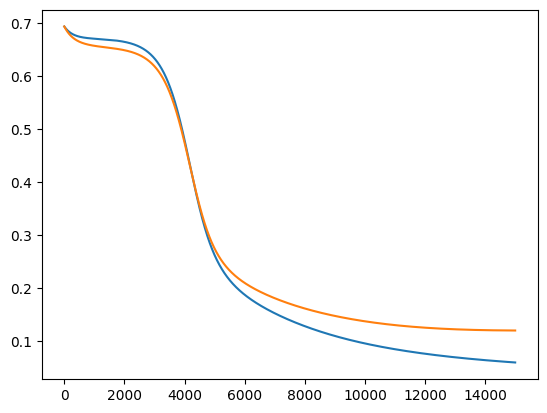

In [ ]:
# import matplotlib.pyplot as plt

# plt.plot(loss)
# plt.plot(val_metrics)

In [ ]:
# ffn = FeedForwardNetwork(config,n_input=X_train.shape[1],n_hidden_1=100,n_hidden_2=200,n_output=y_train.shape[1])

# loss, val_metrics, final_mse = ffn.train(X_train,y_train,X_val,y_val,10000,0.00001)

Epoch 0/10000, Train Loss: 0.6928513194142181, Val Loss: 0.6927468705126819
Epoch 100/10000, Train Loss: 0.6846532036030163, Val Loss: 0.6813182622796979
Epoch 200/10000, Train Loss: 0.6789603277459556, Val Loss: 0.6730005863227142
Epoch 300/10000, Train Loss: 0.674455495770167, Val Loss: 0.6663255892198056
Epoch 400/10000, Train Loss: 0.6701919822830784, Val Loss: 0.6602397031517843
Epoch 500/10000, Train Loss: 0.6652960450926587, Val Loss: 0.653797319400002
Epoch 600/10000, Train Loss: 0.6587366608929743, Val Loss: 0.6459319939374875
Epoch 700/10000, Train Loss: 0.6490800453618526, Val Loss: 0.6352229902783079
Epoch 800/10000, Train Loss: 0.6341764944756462, Val Loss: 0.6196101095498219
Epoch 900/10000, Train Loss: 0.6107792887602308, Val Loss: 0.5960658832353929
Epoch 1000/10000, Train Loss: 0.5743265694049723, Val Loss: 0.5604563853677204
Epoch 1100/10000, Train Loss: 0.5199344787361955, Val Loss: 0.5085616491832079
Epoch 1200/10000, Train Loss: 0.44716475200356753, Val Loss: 0.440

In [ ]:
# val_metrics

[0.6927468705126819,
 0.6926104086903312,
 0.6924744824086666,
 0.6923390885805063,
 0.6922042241382576,
 0.6920698860337474,
 0.6919360712380567,
 0.6918027767413534,
 0.6916699995527295,
 0.6915377367000392,
 0.6914059852297381,
 0.6912747422067241,
 0.6911440047141807,
 0.6910137698534211,
 0.6908840347437334,
 0.6907547965222285,
 0.6906260523436892,
 0.6904977993804199,
 0.6903700348220985,
 0.6902427558756301,
 0.690115959765001,
 0.6899896437311351,
 0.6898638050317519,
 0.6897384409412239,
 0.6896135487504386,
 0.6894891257666586,
 0.6893651693133854,
 0.6892416767302233,
 0.6891186453727449,
 0.6889960726123578,
 0.6888739558361731,
 0.6887522924468739,
 0.6886310798625866,
 0.6885103155167529,
 0.6883899968580015,
 0.6882701213500241,
 0.6881506864714485,
 0.688031689715718,
 0.6879131285909665,
 0.6877950006198988,
 0.6876773033396699,
 0.6875600343017666,
 0.6874431910718893,
 0.6873267712298357,
 0.6872107723693841,
 0.6870951920981806,
 0.6869800280376235,
 0.686865277822

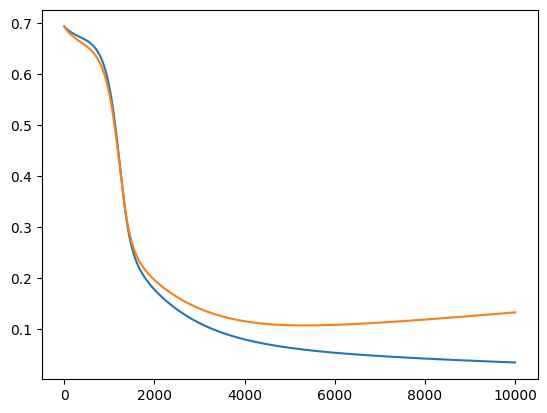

In [ ]:
# plt.plot(loss)
# plt.plot(val_metrics)

In [ ]:
# linear = LinearNetwork(config)

# losses, val_losses = linear.logistic_regression(X_train,y_train,X_val,y_val,epochs=10000,lr=0.0001)

In [ ]:
# losses

[0.6927920064628417,
 0.6486901474980995,
 0.6106263249233086,
 0.5775563494357506,
 0.5486291261093026,
 0.5231585071646707,
 0.5005925524512618,
 0.4804858143108789,
 0.46247646428982175,
 0.44626824587639286,
 0.43161654234195085,
 0.4183177079815667,
 0.40620089521493613,
 0.3951217588958116,
 0.38495756544952575,
 0.37560335572044584,
 0.36696890354758066,
 0.35897628091480976,
 0.35155789043405355,
 0.3446548618550198,
 0.33821573517714254,
 0.33219537168084257,
 0.32655404788395576,
 0.3212566975341847,
 0.31627227429533894,
 0.3115732134891645,
 0.3071349756163912,
 0.30293565775320536,
 0.29895566155392794,
 0.2951774086680419,
 0.29158509603156313,
 0.28816448481617374,
 0.2849027178869922,
 0.28178816148604874,
 0.27881026756520705,
 0.2759594537716273,
 0.27322699856593136,
 0.2706049493476726,
 0.2680860417900463,
 0.26566362885837347,
 0.2633316182146349,
 0.26108441690118744,
 0.2589168823572065,
 0.25682427895658355,
 0.25480223937025315,
 0.2528467301527003,
 0.2509540